In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataframe = pd.read_csv('Data/Churn_Modelling.csv')

In [3]:
dataframe.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataframe.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [5]:
dataframe = dataframe.drop(['RowNumber','CustomerId','Surname','Gender'], axis=1)

In [6]:
dataframe.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1
3,699,France,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0


In [7]:
dataframe.shape

(10000, 10)

In [8]:
dataframe = pd.get_dummies(dataframe)

In [9]:
dataframe.shape

(10000, 12)

In [10]:
dataframe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [11]:
dataframe.isna().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
dtype: int64

In [12]:
(dataframe == 0).sum()

CreditScore             0
Age                     0
Tenure                413
Balance              3617
NumOfProducts           0
HasCrCard            2945
IsActiveMember       4849
EstimatedSalary         0
Exited               7963
Geography_France     4986
Geography_Germany    7491
Geography_Spain      7523
dtype: int64

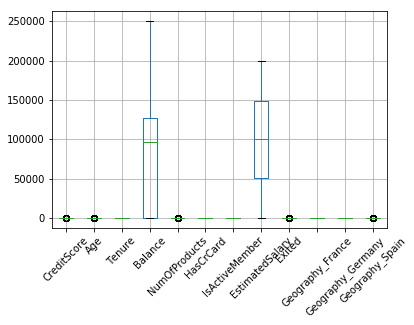

In [13]:
dataframe.boxplot(rot=45)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd68b36ae48>,
      dtype=object)

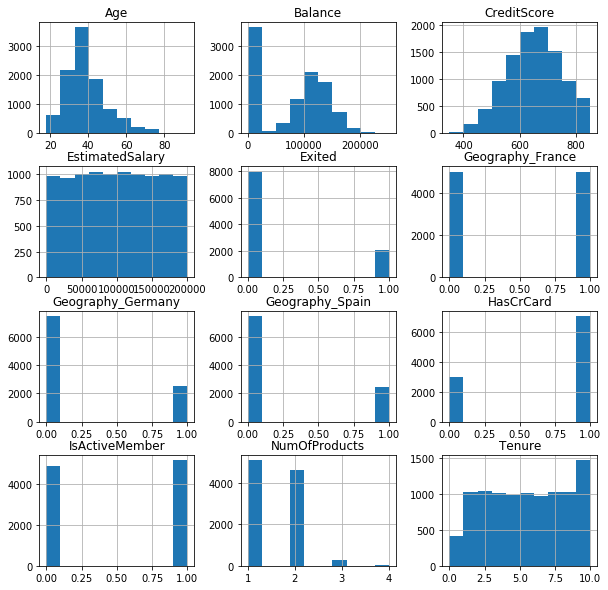

In [14]:
dataframe.hist(figsize=(10,10))

In [15]:
def feature_scaling(dataframe,column):
    dataframe[column] = np.divide(np.subtract(dataframe,dataframe[column].mean()),
                                  dataframe[column].std())
    print("scaled ",column)
    return dataframe[column]

In [16]:
def split(dataframe,num):
    test_data = dataframe.tail(num).reset_index(drop=True)
    return dataframe.head(dataframe.shape[0]-num).reset_index(), test_data.reset_index()

In [17]:
dataframe = dataframe.rename(columns={'Exited':'y'})

In [18]:
dataframe,test_data = split(dataframe,1000)
# here 1000 is the number of rows we want in our test data

In [19]:
Exited = dataframe['y']

In [20]:
# column = ['CreditScore','Age','Balance','EstimatedSalary','Tenure']
for item in dataframe:
    dataframe[item] = feature_scaling(dataframe,item)
#     dataframe[item] = DataPreprocessing.feature_scaling(dataframe,item)

scaled  index
scaled  CreditScore
scaled  Age
scaled  Tenure
scaled  Balance
scaled  NumOfProducts
scaled  HasCrCard
scaled  IsActiveMember
scaled  EstimatedSalary
scaled  y
scaled  Geography_France
scaled  Geography_Germany
scaled  Geography_Spain


In [21]:
# Restoring the values of the output column
dataframe['y'] = Exited

In [22]:
dataframe.head()

,index,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,y,Geography_France,Geography_Germany,Geography_Spain
0,-1.731762,-6.733244,-3.889298,-2.333158,-1.223806,-5.606532,-5.323248,-4.492037,-1.742713,1,-4.462832,-4.576851,-4.575168
1,-1.731377,-6.733240,-3.889261,-2.333025,-1.223806,-5.605871,-5.322407,-4.491267,-1.742713,0,-4.462063,-4.575962,-4.574279
2,-1.730992,-6.733236,-3.889224,-2.332892,-1.223806,-5.605210,-5.321565,-4.490497,-1.742713,1,-4.461293,-4.575073,-4.573391
3,-1.730608,-6.733232,-3.889187,-2.332758,-1.223806,-5.604549,-5.320723,-4.489727,-1.742713,0,-4.460523,-4.574184,-4.572502
4,-1.730223,-6.733228,-3.889150,-2.332625,-1.223806,-5.603888,-5.319882,-4.488957,-1.742713,0,-4.459753,-4.573295,-4.571614


In [23]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
index,9000.0,6.982069e-18,1.000000,-1.731762,-0.865881,0.000000,0.865881,1.731762
CreditScore,9000.0,-6.715356e+00,0.010329,-6.733244,-6.724300,-6.715356,-6.706412,-6.697468
Age,9000.0,-3.723652e+00,0.095651,-3.889298,-3.806475,-3.723652,-3.640830,-3.558007
Tenure,9000.0,-1.733482e+00,0.346281,-2.333158,-2.033320,-1.733482,-1.433644,-1.133806
Balance,9000.0,-1.223779e+00,0.000016,-1.223806,-1.223793,-1.223779,-1.223765,-1.223751
NumOfProducts,9000.0,-2.631385e+00,1.717988,-5.606532,-4.118959,-2.631385,-1.143812,0.343762
HasCrCard,9000.0,-1.535969e+00,2.186951,-5.323248,-3.429609,-1.535969,0.357671,2.251311
IsActiveMember,9000.0,-1.027432e+00,2.000624,-4.492037,-2.759734,-1.027432,0.704871,2.437174
EstimatedSalary,9000.0,-1.742683e+00,0.000017,-1.742713,-1.742698,-1.742683,-1.742668,-1.742653
y,9000.0,2.064444e-01,0.404776,0.000000,0.000000,0.000000,0.000000,1.000000


In [24]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 13 columns):
index                9000 non-null float64
CreditScore          9000 non-null float64
Age                  9000 non-null float64
Tenure               9000 non-null float64
Balance              9000 non-null float64
NumOfProducts        9000 non-null float64
HasCrCard            9000 non-null float64
IsActiveMember       9000 non-null float64
EstimatedSalary      9000 non-null float64
y                    9000 non-null int64
Geography_France     9000 non-null float64
Geography_Germany    9000 non-null float64
Geography_Spain      9000 non-null float64
dtypes: float64(12), int64(1)
memory usage: 914.1 KB


In [25]:
test_data.head()

,index,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,y,Geography_France,Geography_Germany,Geography_Spain
0,0,616,37,9,0.00,1,1,0,111312.96,0,1,0,0
1,1,688,32,6,124179.30,1,1,1,138759.15,0,0,0,1
2,2,605,36,7,128829.25,1,1,0,190588.59,0,1,0,0
3,3,676,33,6,171490.78,1,0,0,79099.64,0,1,0,0
4,4,708,33,3,0.00,2,1,0,138613.21,0,0,0,1


In [26]:
test_data = test_data.drop('index', axis=1)

In [27]:
test_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,y,Geography_France,Geography_Germany,Geography_Spain
0,616,37,9,0.00,1,1,0,111312.96,0,1,0,0
1,688,32,6,124179.30,1,1,1,138759.15,0,0,0,1
2,605,36,7,128829.25,1,1,0,190588.59,0,1,0,0
3,676,33,6,171490.78,1,0,0,79099.64,0,1,0,0
4,708,33,3,0.00,2,1,0,138613.21,0,0,0,1


In [28]:
class Neural_Network:
    
    def __init__(self):
        self.iteration = 9000
        self.learning_rate = 0.008
        self.neurons = 5
        self.boundary = 0.5
    
    def sigmoid(self,Z):
        gz= np.divide(1, 1+np.power(np.e,np.multiply(-1,Z)))
        return gz
    
    def train(self,dataframe):
        fig = plt.figure()
        fig, (ax1, ax3) = plt.subplots(nrows=2, ncols=1, figsize=(5, 20))
        # stores the num rows in dataframe
        train_size = dataframe.shape[0] 
        # storing the outputs of dataframe
        train_outputs = pd.DataFrame(dataframe['y']).T # 1,m
        # deleting the outputs from dataframe for computing
        dataframe = dataframe.drop('y',axis=1) # m,12
        # adding dummy layer to the data frame
        try:
            dataframe = dataframe.drop('index',axis=1)
        except Exception as e:
            print()
        # weights of hidden layer
        weights1 = np.random.rand(self.neurons,dataframe.shape[1]) # 5,12
        bais1 = np.full((self.neurons,1),0.5) # 5,1
        # weights of output layer
        weights2 = np.random.rand(1,self.neurons) # 1,5
        bais2 = np.full((1,1),0.5) # 1,5
        
        for iteration in range(1,self.iteration):
        # forward propagation
            # hidden layer
            Z1 =  pd.DataFrame(np.add(np.matmul(weights1,dataframe.T),bais1)) # 5,m
            A1 = self.sigmoid(Z1) # 5,m
            
            # output layer
            Z2 = pd.DataFrame(np.add(np.matmul(weights2,A1),bais2)) # 1,m
            A2 = self.sigmoid(Z2) # 1,m
#             print("A2: {}, Z2: {}".format(A2.shape,Z2.shape))
            loss = np.add(
                    np.multiply(
                        np.log(A2.T),train_outputs.T
                    ),np.multiply(
                        np.subtract(1,train_outputs.T),
                                        np.log(np.subtract(1,A2.T))))
            loss = np.divide(loss.sum(),train_size)*(-1)
        # as above loss was becoming an array hence converted into a single number

            loss= loss[0]
            if iteration%50==0:
                ax1.plot(iteration,loss, markersize=0.8,marker='*',color='r')
#                 self.ax2.plot(dataframe.iloc[0,0],(dataframe.iloc[0,0]*weights2[0,0])+bais2[0],  markersize=0.6,marker='*',color='g')
#                 self.ax2.plot(iteration,dataframe.iloc[0,iteration], markersize=0.6,marker='.',color='y')
                ax3.scatter(iteration,train_outputs[iteration])
            # backward propagation
            # output side
            dz2 = np.subtract(A2,train_outputs) # 1,m
            dw2 = np.divide(np.matmul(dz2,A1.T),train_size) # 1,5
            db2 = np.array(np.sum(dz2,axis=1)/train_size).reshape(1,1)  # 1,1           
            weights2 = np.subtract(weights2,np.multiply(self.learning_rate,dw2)) # 1,5
            bais2 = bais2 - self.learning_rate*db2 # 1,1
            # hidden layer side
            g1_derv = np.multiply(A1,np.subtract(1,A1)) # 5,m
            dz1=np.multiply(np.matmul(weights2.T,dz2),g1_derv) # 5,m
            dw1=np.divide(np.matmul(dz1,dataframe),train_size) # 5,8
            db1=np.array(np.divide(np.sum(dz1 ,axis=1),train_size)).reshape(dz1.shape[0],1) # 5,1
            weights1= np.subtract(weights1,np.multiply(self.learning_rate,dw1)) # 5,8
            bais1 = np.subtract(bais1,np.multiply(self.learning_rate,db1)) # 5,1
        ax1.set_title("iteration vs loss")
        ax2.set_title('weight21 vs Ypred21')
        plt.show()
        return weights1,bais1,weights2,bais2
    
    def test(self,test_data,weights1,bais1,weights2,bais2):
        outputs = np.array(test_data['y']).reshape(test_data.shape[0],1) # m,1
        try:
            outputs = outputs.drop('index', axis=1)
        except Exception as e:
            print()
        test_size = test_data.shape[0]
        test_data = test_data.drop('y',axis=1) # m,12
        try:
            test_data = test_data.drop('index',axis=1) 
        except Exception as e:
            print()
#         test_data = test_data.drop('index',axis=1)
        Z1= np.add(np.matmul(weights1,test_data.T),bais1) # added transpose # 5,m
        A1 = self.sigmoid(Z1) # 5,m
        # outputs
        Z2 = np.add(np.matmul(weights2,A1),bais2) # 1,m
        A2 = self.sigmoid(Z2).T # 1,m
        Ypred =np.zeros(test_data.shape[0]) # m,1
        count = 0
        for counter in range(0,test_data.shape[0]):
            if A2[counter]<self.boundary :
                Ypred[counter]=1
            else:
                Ypred[counter]=0
            if Ypred[counter]==outputs[counter]:
                count+=1
        accuracy  = count/test_data.shape[0]
        print("Accuracy",accuracy*100)
    
    def main(self,dataframe,test_data):
        weights1,bais1,weights2,bais2 = self.train(dataframe)
        print("Weights1 : {},bais1: {} , we2: {}, bais2: {}"
              .format(weights1.shape,bais1.shape,weights2.shape,bais2.shape))
        self.test(test_data,weights1,bais1,weights2,bais2)

In [29]:
neuron =  Neural_Network()

In [30]:
# weights1,bais1,weights2,bais2 = neuron.train(dataframe)

NameError: name 'ax2' is not defined

<Figure size 432x288 with 0 Axes>

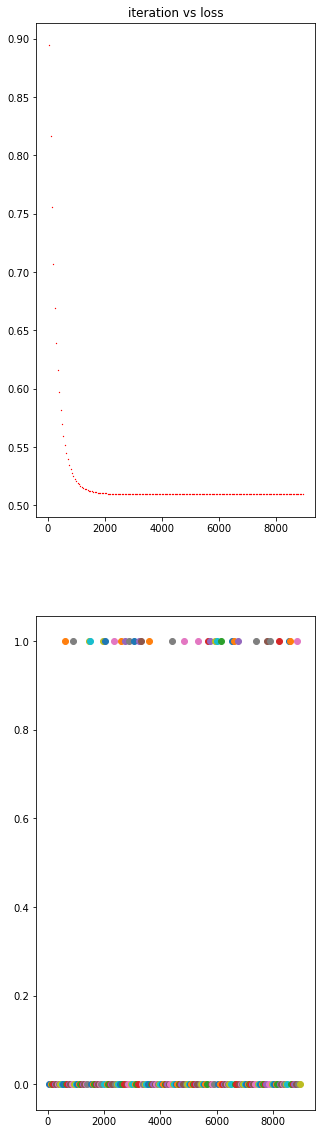

In [31]:
neuron.main(dataframe,test_data)